In [1]:
from collections import defaultdict
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib.colors import rgb2hex, colorConverter
from scipy.cluster.hierarchy import set_link_color_palette
import pandas as pd
import scipy.cluster.hierarchy as sch
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9

In [27]:
clustdf=pd.read_csv(""Geneva Ionomics_Y_Spec_as_int only .csv"")


KeyError: '[24] not found in axis'

In [28]:
dataset[0:26]

,IVNO,genus_species,B11,Na23,Mg26,Al27,P31,S34,K39,Ca44,...,Mn55,Co59,Ni60,Cu63,Zn66,As75,Rb85,Sr88,Mo98,Cd111
0,318684,1,94.737452,196.644672,1776.847433,14.015541,6214.957396,1986.070463,18823.60057,5107.996944,...,191.923742,0.081735,0.811444,33.255243,95.859746,0.005128,16.256776,5.981147,0.278855,0.024450
1,588141,1,23.352362,131.009202,1166.801218,15.981347,5660.589666,1305.737926,15284.87070,3971.658387,...,101.724123,0.048140,0.343131,33.814473,69.386864,0.017477,7.492277,3.537671,0.156314,0.060345
2,588646,1,137.680886,111.022071,1976.897836,26.302390,7208.531961,2512.636791,20787.04128,5653.053084,...,146.973893,0.063966,0.277827,58.400894,83.124578,0.004849,7.214685,3.383637,0.297982,0.017739
3,588448,1,18.207032,58.447077,1469.811734,24.007341,5342.222323,2400.683753,16094.43910,3800.777526,...,218.874289,0.099867,0.416359,55.600415,120.534218,0.010221,11.923196,1.183187,0.171235,0.038915
4,1583,1,58.775194,119.388231,1349.136877,67.323999,5412.124249,2412.665543,17162.72458,2307.560196,...,357.633934,0.169915,0.658896,68.828553,153.686687,0.060230,7.493530,1.004368,0.194630,0.021889
5,588459,1,41.102828,87.445535,1684.590025,29.690969,4674.481989,2198.630234,19260.62195,5096.823405,...,204.671720,0.153866,0.670246,45.526701,149.053153,0.015216,14.574310,2.601915,0.280342,0.046425
6,588378,1,68.409526,97.876906,1114.879546,15.962495,4428.264042,1983.040054,17219.19337,3426.533558,...,245.652197,0.106725,0.299654,21.949714,110.165596,0.011381,7.764358,1.931030,0.179861,0.015593
7,588144,1,48.988139,98.814555,1255.779925,11.611556,5575.285430,1918.963830,19951.35809,4945.154980,...,97.001047,0.043707,0.491032,28.116646,85.471754,0.015618,11.258202,2.572242,0.211537,0.047607
8,588393,1,29.563568,182.133207,1133.191384,18.656845,5008.453549,2518.870236,17381.53539,6224.334293,...,293.226178,0.111532,0.309928,26.783561,66.417347,0.017571,10.627777,7.035986,0.320263,0.013744
9,588325,1,120.401908,134.214075,1106.274306,13.746467,4915.789867,1919.394950,18315.57225,3275.774958,...,83.612723,0.047619,0.237915,20.325363,64.023216,0.011927,8.023974,2.299023,0.184270,0.007752


In [29]:
clustdf.shape

(201, 21)

In [30]:
clustdf_t=clustdf.transpose()

In [31]:
c_dist = pdist(clustdf_t) # computing the distance
c_link = linkage(clustdf_t,  metric='correlation', method='complete')# computing the linkage

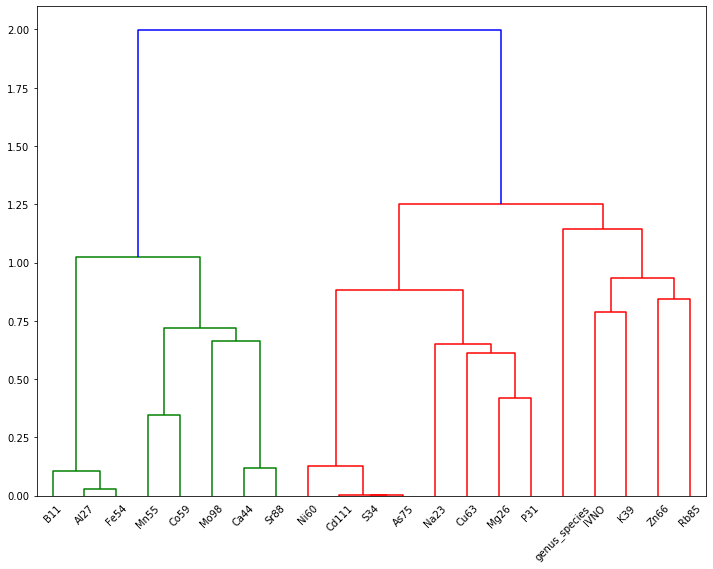

In [32]:
B=dendrogram(c_link,labels=list(clustdf.columns))

In [33]:
class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'

        html += '</table>'

        return html
def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))
    
    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l
    
    return cluster_classes

In [34]:
def get_clust_graph(df, numclust, transpose=False, dataname=None, save=False, xticksize=8):
    if transpose==True:
        aml=df.transpose()
        xl="x-axis"
    else:
        aml=df
        xl="y-axis"
    data_dist = pdist(aml.transpose()) # computing the distance
    data_link = linkage(data_dist,  metric='correlation', method='complete')#method="complete") # computing the linkage
    B=dendrogram(data_link,labels=list(aml.columns),p=numclust, truncate_mode="lastp",get_leaves=True, count_sort='ascending', show_contracted=True)
    #myInd = [i for i, c in zip(B['ivl'], B['color_list']) if c=='g']
    get_cluster_classes(B)
    ax=plt.gca()
    ax.tick_params(axis='x', which='major', labelsize=xticksize)
    ax.tick_params(axis='y', which='major', labelsize=15)
    plt.xlabel(xl)
    #plt.set_size_inches(18.5, 10.5)
    plt.ylabel('Distance')
    plt.suptitle(xl+" clustering for "+dataname, fontweight='bold', fontsize=16);
    if save:
        plt.savefig(str(df.index.name)+str(numclust)+"tr_"+str(transpose)+"dn_"+str(dataname)+save+'.png')
    else:
        print("Not saving")
    return get_cluster_classes(B)

In [35]:
def give_cluster_assigns(df, numclust, tranpose=True):
    if transpose==True:
        data_dist = pdist(df.transpose())
        data_link = linkage(data_dist,  metric='correlation', method='complete')
        cluster_assigns=pd.Series(sch.fcluster(data_link, numclust, criterion='maxclust', monocrit=None), index=df.columns)
    else:
        data_dist = pdist(df)
        data_link = linkage(data_dist,  metric='correlation', method='complete')
        cluster_assigns=pd.Series(sch.fcluster(data_link, numclust, criterion='maxclust', monocrit=None), index=df.index)
    for i in arange(1,numclust+1):
        print("Cluster ",str(i),": ( N =",len(cluster_assigns[cluster_assigns==i].index),")", ", ".join(list(cluster_assigns[cluster_assigns==i].index)))

Not saving


g,"[4, 61, 33, 0, 125, 156, 168, 13, 102, 156, 129, 140, 142, 196, 197, 198, 200, 123, 58, 106, 110, 111, 51, 82, 199, 64, 76, 109, 14, 80, 15, '(3)', 66, 79, 131, 83, 119, 137, 53, 85, 54, 86, 133, 52, 67, 81, 78, 191, 130, 136, 17, 137, 118, 20, 90, 30, 38, 28, 32, 45, 27, 26, 46, 69, 159, 22, 157, 23, 40, 41, 104, 95, 23, 148, 46, 37, 60, 19, 96, 108, 153, 115, 193, 103, 124, 147, 21, 19, 44, 87, 190, 16, 194, 182, 6, 65, 3, 183, '(2)', 113, 178, 117, 97, 192, 101, 138, 1, '(2)', 35, 73, 59, 114, 70, 72, 195, 167, 185, 166, 163, 55, 165, 132, 139, 179, 180, 161, 173, 174, 172, 43, 141, 7, 187, 126, 186, 7, 75, 164, 62, '(2)', 154, 188, 9, 11, 63, 34, 120, 107, 155, 152, 2, 42, 31, 146, 162, 25, 39, 92, 8, '(2)', 99, 100, 18, 94, 144, 48, 49, 47, 57, '(2)', 184, 5, 176, 158, 177, 143, 145, 56, 10, 127, 71, 121, 91, 149, 84, 170, 169, 171, 84, 93, 98, 116, 160, 189, 112, 135, '(2)', 105, 29]"
b,[24]


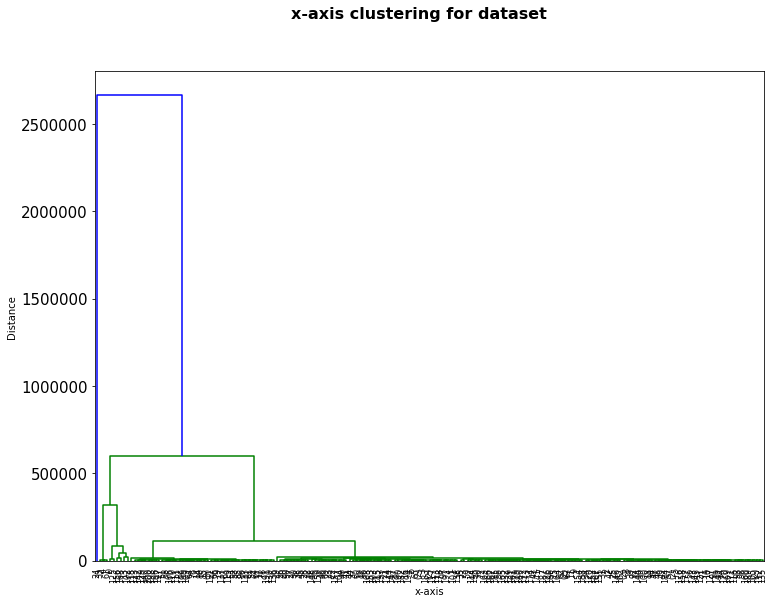

In [37]:
get_clust_graph(clustdf, 193, transpose=True,dataname="dataset")

In [38]:
rcParams['figure.figsize'] = 50, 9
rcParams['axes.labelsize'] = "large"
rcParams['font.size']= 20

g,"[4, 61, 33, 0, 125, 156, 168, 13, 102, 156, 129, 140, 142, 196, 197, 198, 200, 123, 58, 106, 110, 111, 51, 82, 199, 64, 76, 109, 14, 80, 15, '(3)', 66, 79, 131, 83, 119, 137, 53, 85, 54, 86, 133, 52, 67, 81, 78, 191, 130, 136, 17, 137, 118, 20, 90, 30, 38, 28, 32, 45, 27, 26, 46, 69, 159, 22, 157, 23, 40, 41, 104, 95, 23, 148, 46, 37, 60, 19, 96, 108, 153, 115, 193, 103, 124, 147, 21, 19, 44, 87, 190, 16, 194, 182, 6, 65, 3, 183, '(2)', 113, 178, 117, 97, 192, 101, 138, 1, '(2)', 35, 73, 59, 114, 70, 72, 195, 167, 185, 166, 163, 55, 165, 132, 139, 179, 180, 161, 173, 174, 172, 43, 141, 7, 187, 126, 186, 7, 75, 164, 62, '(2)', 154, 188, 9, 11, 63, 34, 120, 107, 155, 152, 2, 42, 31, 146, 162, 25, 39, 92, 8, '(2)', 99, 100, 18, 94, 144, 48, 49, 47, 57, '(2)', 184, 5, 176, 158, 177, 143, 145, 56, 10, 127, 71, 121, 91, 149, 84, 170, 169, 171, 84, 93, 98, 116, 160, 189, 112, 135, '(2)', 105, 29]"
b,[24]


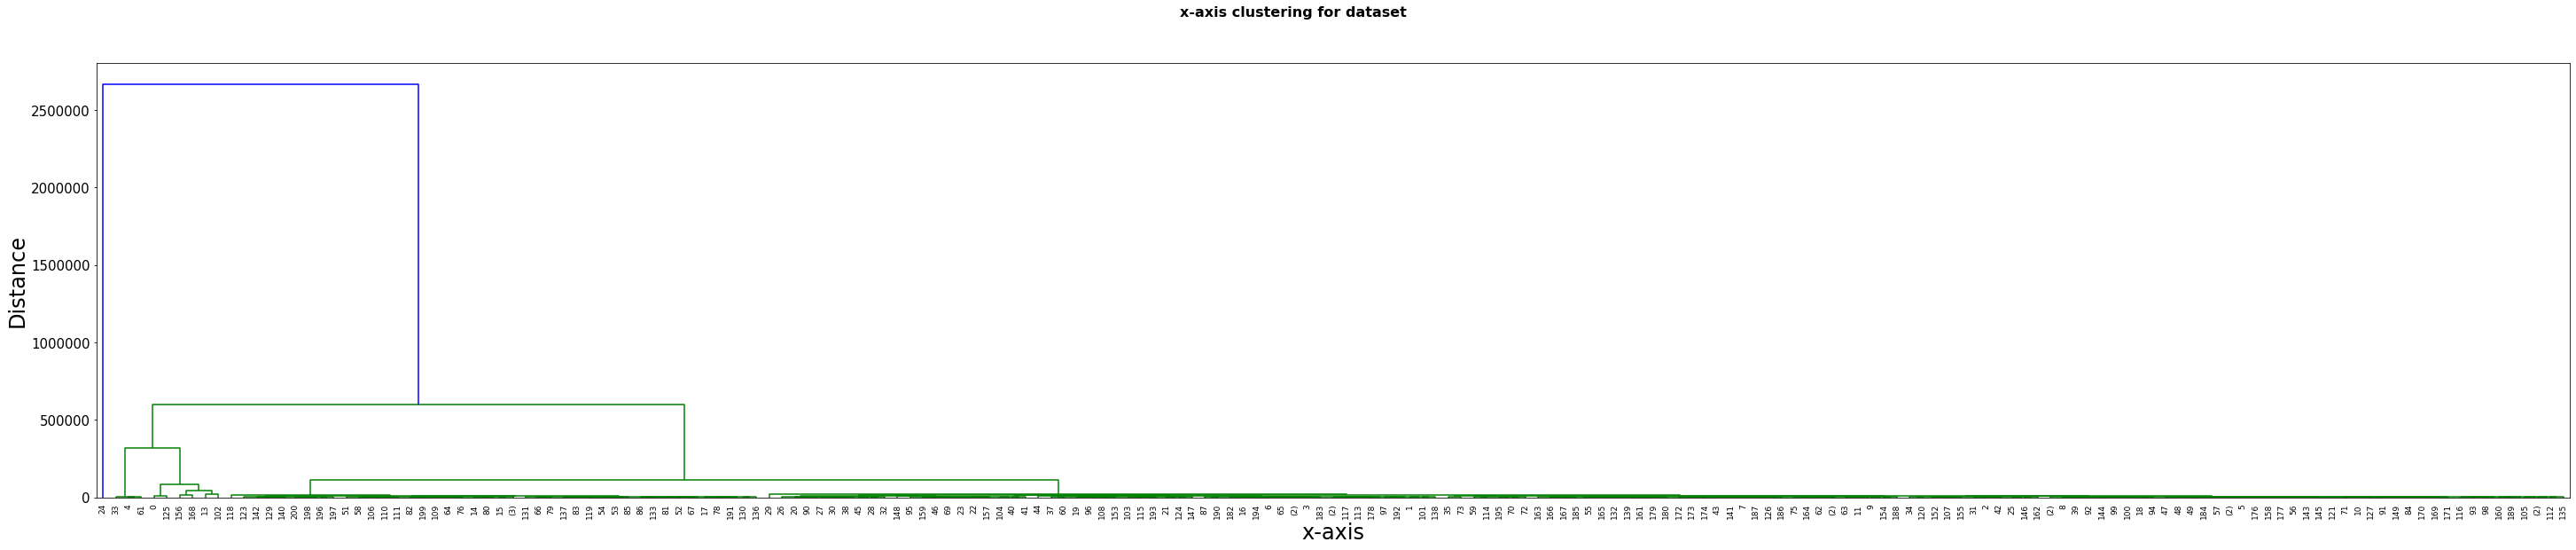

In [39]:
get_clust_graph(clustdf, 193, transpose=True,dataname="dataset", save="ww2", xticksize=9)

In [40]:
image<-Save plot
ggsave(device="png", image,dpi=1500,filename ="../Figures/imageplot.png")

SyntaxError: invalid syntax (<ipython-input-40-7bd32b6f2c6a>, line 1)